# Name : *Mariam Bebawy*  
## Track : *Data Science & Business Analytics*  

### Task 5 : *Exploratory Data Analysis - Sports*  
perform 'Exploratory Data Analysis' on dataset 'Indian Premier League'  
as a sports analyst, find out the most successful teams, players, and factors contributing win or loss of a team  
suggest teams or players a company should endorse for its products  
**advanced level:** create storyboards  

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, Combobox, interact

In [7]:
pd.set_option('display.max_columns', None)

In [37]:
df_matches = pd.read_csv('./matches.csv')
print(df_matches.shape)
df_matches.head()

(756, 18)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [38]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [39]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [40]:
df_matches = df_matches.drop(['umpire3'], axis=1)
df_matches = df_matches.dropna()

In [42]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               743 non-null    int64 
 1   season           743 non-null    int64 
 2   city             743 non-null    object
 3   date             743 non-null    object
 4   team1            743 non-null    object
 5   team2            743 non-null    object
 6   toss_winner      743 non-null    object
 7   toss_decision    743 non-null    object
 8   result           743 non-null    object
 9   dl_applied       743 non-null    int64 
 10  winner           743 non-null    object
 11  win_by_runs      743 non-null    int64 
 12  win_by_wickets   743 non-null    int64 
 13  player_of_match  743 non-null    object
 14  venue            743 non-null    object
 15  umpire1          743 non-null    object
 16  umpire2          743 non-null    object
dtypes: int64(5), object(12)
memory usag

In [9]:
df_deliveries = pd.read_csv('./deliveries.csv')
print(df_deliveries.shape)
df_deliveries.head()

(179078, 21)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [127]:
df_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [129]:
df_deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [131]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

<AxesSubplot:title={'center':'team wins over all seasons'}, xlabel='count', ylabel='winner'>

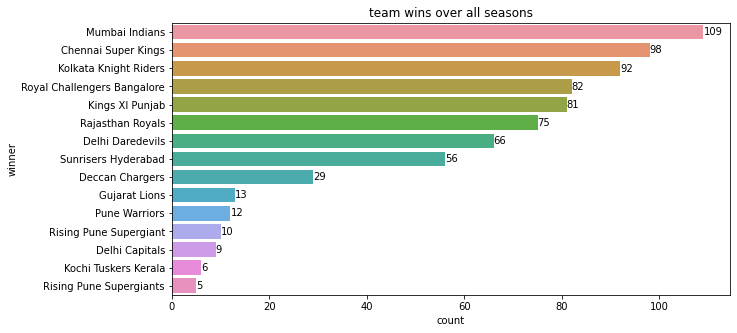

In [77]:
# matches dataset
# most successful teams overall across all seasons

plt.figure(figsize = (10,5))
plt.title('team wins over all seasons')
ax = sns.countplot(
    y='winner',
    data=df_matches,
    order=df_matches['winner'].value_counts().index
)
ax.bar_label(ax.containers[0])
ax


In [48]:
# most successful teams by season

seasons = df_matches['season'].unique()
seasons.sort()

def season_match(season):
    ey = df_matches[df_matches['season'] == season]
    plt.figure(figsize = (10,5))
    ax = sns.countplot(
        y='winner',
        data=ey,
        order=df_matches['winner'].value_counts().index
    )
    ax.bar_label(ax.containers[0])
    return ax

interact(season_match, season=seasons);

interactive(children=(Dropdown(description='season', options=(2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, …

In [45]:
# by examining both the plots above
# companies can endorse 'Mumbai Indians' / 'Kolkata Knight Riders' / 'Sunrise Hyderabad' / 'CHennai Super Kings'
# all of them are at an all time high during the recent years
# these are just some suggestions

In [49]:
wins_per_season = df_matches.groupby('season')['winner'].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

<AxesSubplot:title={'center':'player of the match over all seasons'}, xlabel='count', ylabel='player_of_match'>

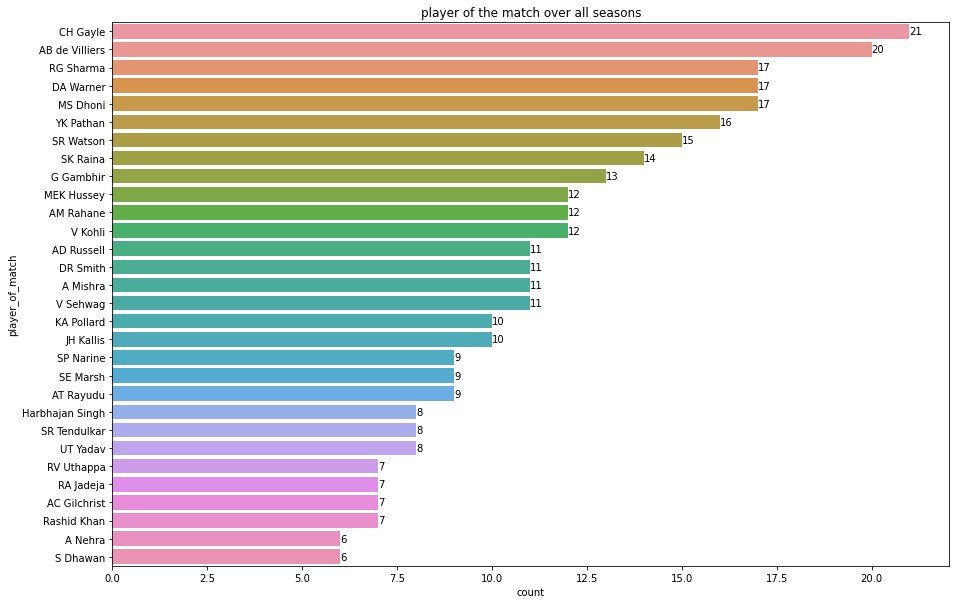

In [78]:
# matches dataset
# most successful players overall across all seasons

plt.figure(figsize = (15,10))
plt.title('player of the match over all seasons')
ax = sns.countplot(
    y='player_of_match',
    data=df_matches,
    order=df_matches['player_of_match'].value_counts()[0:30].index
)
ax.bar_label(ax.containers[0])
ax


In [70]:
# most successful teams by season

seasons = df_matches['season'].unique()
seasons.sort()

def season_match(season):
    ey = df_matches[df_matches['season'] == season]
    plt.figure(figsize = (15,10))
    ax = sns.countplot(
        y='player_of_match',
        data=ey,
        order=df_matches['player_of_match'].value_counts()[0:30].index
    )
    ax.bar_label(ax.containers[0])
    return ax

interact(season_match, season=seasons);

interactive(children=(Dropdown(description='season', options=(2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, …

In [71]:
# by examining both the plots above
# companies can endorse 'AD Russel' / 'AB de Villers' / 'CH Gayle' / 'RG Sharma'
# all of them have consistently high scores during the recent years
# these are just some suggestions

<AxesSubplot:title={'center':'matches hosted in venues'}, xlabel='count', ylabel='venue'>

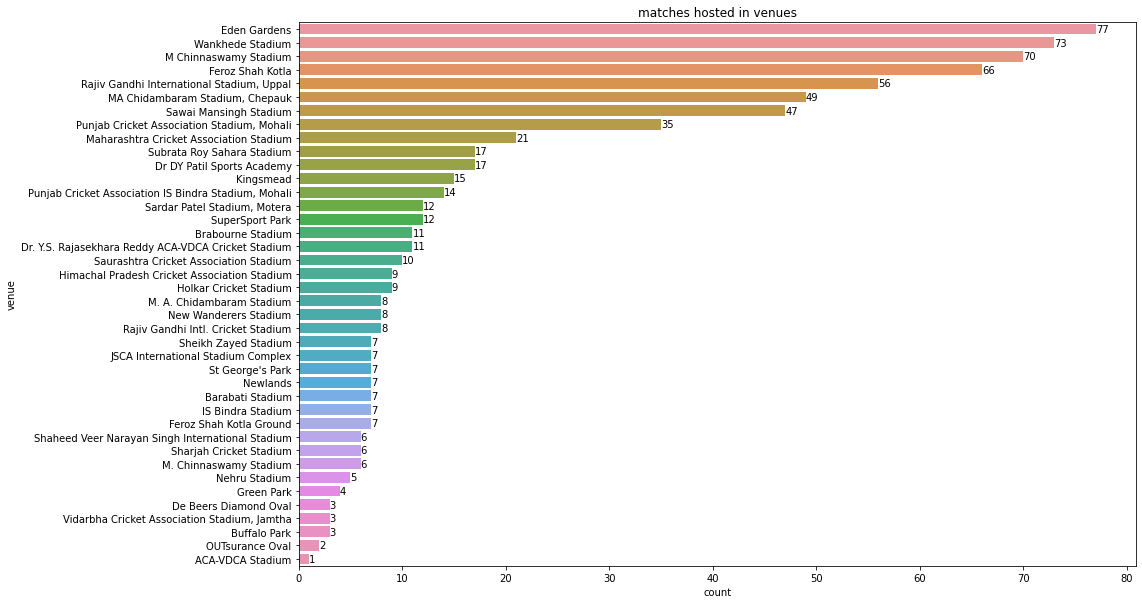

In [87]:
# matches dataset
# venues hosting the most matches

plt.figure(figsize = (15,10))
plt.title('matches hosted in venues')
ax = sns.countplot(
    y='venue',
    data=df_matches,
    order=df_matches['venue'].value_counts().index
)
ax.bar_label(ax.containers[0])
ax


In [80]:
# matches dataset
# group by toss winner and winner

df = df_matches.loc[df_matches['toss_winner'] == df_matches['winner']]
print(df.shape)
df.head()

(388, 17)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan


In [98]:
d1 = df_matches['winner'].value_counts()
d2 = df_matches['toss_winner'].value_counts()
d3 = df['winner'].value_counts()
toss_win = pd.DataFrame([d1, d2, d3], index=['match wins', 'toss wins', 'toss and match wins'])
toss_win

,Mumbai Indians,Chennai Super Kings,Kolkata Knight Riders,Royal Challengers Bangalore,Kings XI Punjab,Rajasthan Royals,Delhi Daredevils,Sunrisers Hyderabad,Deccan Chargers,Gujarat Lions,Pune Warriors,Rising Pune Supergiant,Delhi Capitals,Kochi Tuskers Kerala,Rising Pune Supergiants
match wins,109,98,92,82,81,75,66,56,29,13,12,10,9,6,5
toss wins,96,89,91,78,80,77,79,45,43,15,20,6,9,8,7
toss and match wins,56,57,53,39,34,42,35,22,19,10,3,5,6,4,3


In [100]:
toss_win = toss_win.transpose()
toss_win

,match wins,toss wins,toss and match wins
Mumbai Indians,109,96,56
Chennai Super Kings,98,89,57
Kolkata Knight Riders,92,91,53
Royal Challengers Bangalore,82,78,39
Kings XI Punjab,81,80,34
Rajasthan Royals,75,77,42
Delhi Daredevils,66,79,35
Sunrisers Hyderabad,56,45,22
Deccan Chargers,29,43,19
Gujarat Lions,13,15,10


<AxesSubplot:>

<Figure size 1080x864 with 0 Axes>

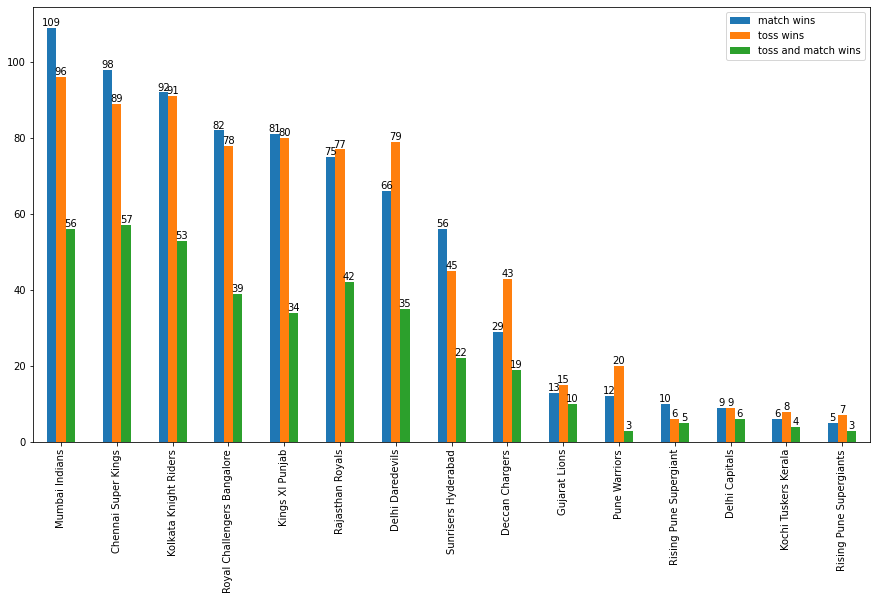

In [126]:
plt.figure(figsize = (15,12),)
ax = toss_win.plot(kind='bar', figsize=(15,8))
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
ax